<a href="https://colab.research.google.com/github/simaadleyba/CS210-Fall-22-23/blob/main/crime_and_currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the crime data
crime = pd.read_excel('/content/drive/MyDrive/CS210 - Turkey In Chains/Veriler/Crime Statistics/2011-2020 Turkey Incarceration.xls')

# Group the dataframe by Year and sum up the Rate per 100.000 column
total_crime_rate = crime.groupby('Year')['Rate per 100,000'].sum().reset_index()

# Converting year column to int
total_crime_rate['Year'] = total_crime_rate['Year'].astype(int)

# Print the new dataframe
total_crime_rate

,Year,"Rate per 100,000"
0,2011,107.188737
1,2012,152.729070
2,2013,210.924097
3,2014,219.745175
4,2015,214.279583
5,2016,235.206795
6,2017,266.996162
7,2018,325.458983
8,2019,338.650725
9,2020,309.039014


In [ ]:
# Loading the currency data and arranging it
currency_stats_df = pd.read_csv('/content/drive/MyDrive/CS210 - Turkey In Chains/Veriler/Currency Stats/currency_stats.csv')

# Dropping unnecessary rows
currency_df = currency_stats_df[:10]

# Creating a list of new column names
new_columns = ["Year", "USD Buying Rate", "USD Selling Rate",]

# Assigning the new column names to the DataFrame
currency_df.columns = new_columns
currency_df.columns = currency_df.columns.str.strip()

# Converting the columns to numeric values
currency_df['Year'] = currency_df['Year'].astype(int)
currency_df['USD Buying Rate'] = pd.to_numeric(currency_df['USD Buying Rate'], errors='coerce')
currency_df['USD Selling Rate'] = pd.to_numeric(currency_df['USD Selling Rate'], errors='coerce')

# Adding an 'Average' column as we have different buying and selling rates
currency_df['Average'] = (currency_df['USD Buying Rate'] + currency_df['USD Selling Rate']) / 2

# Displaying the modified dataframe
currency_df

<ipython-input-3-6e65a38993cd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currency_df['Year'] = currency_df['Year'].astype(int)
<ipython-input-3-6e65a38993cd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currency_df['USD Buying Rate'] = pd.to_numeric(currency_df['USD Buying Rate'], errors='coerce')
<ipython-input-3-6e65a38993cd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Year,USD Buying Rate,USD Selling Rate,Average
0,2011,1.67,1.68,1.675
1,2012,1.79,1.80,1.795
2,2013,1.90,1.91,1.905
3,2014,2.19,2.19,2.190
4,2015,2.72,2.72,2.720
5,2016,3.02,3.03,3.025
6,2017,3.65,3.65,3.650
7,2018,4.81,4.82,4.815
8,2019,5.67,5.68,5.675
9,2020,7.01,7.02,7.015


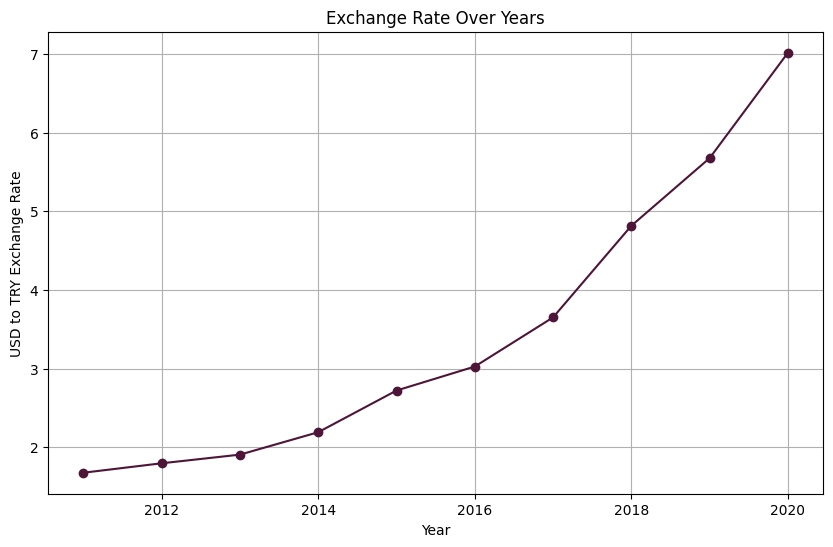

In [ ]:
# Making a plot of currency trend
plt.figure(figsize=(10, 6))
plt.plot(currency_df['Year'], currency_df['Average'], marker='o', linestyle='-', color='#4E1538')
plt.xlabel('Year')
plt.ylabel('USD to TRY Exchange Rate')
plt.title('Exchange Rate Over Years')
plt.grid(True)

plt.show()

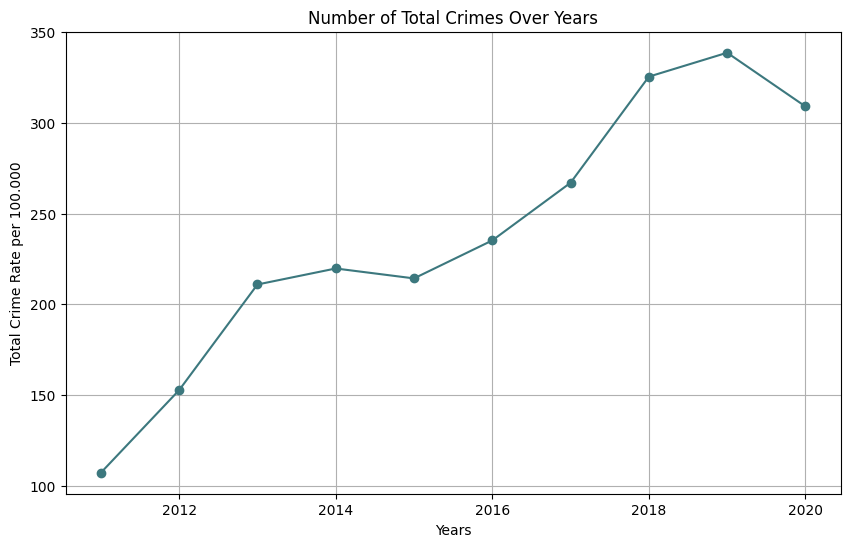

In [ ]:
# Making a line graph of total crimes
plt.figure(figsize=(10, 6))
plt.plot(total_crime_rate['Year'], total_crime_rate['Rate per 100,000'], marker='o', linestyle='-', color='#3C787E')
plt.xlabel('Years')
plt.ylabel('Total Crime Rate per 100.000')
plt.title('Number of Total Crimes Over Years')
plt.grid(True)

plt.show()

In [ ]:
# Creating a merged dataframe

# Merging the DataFrames based on the "Years" column
merged_df = pd.merge(total_crime_rate, currency_df, on="Year")

# Displaying the merged dataframe
merged_df

,Year,"Rate per 100,000",USD Buying Rate,USD Selling Rate,Average
0,2011,107.188737,1.67,1.68,1.675
1,2012,152.729070,1.79,1.80,1.795
2,2013,210.924097,1.90,1.91,1.905
3,2014,219.745175,2.19,2.19,2.190
4,2015,214.279583,2.72,2.72,2.720
5,2016,235.206795,3.02,3.03,3.025
6,2017,266.996162,3.65,3.65,3.650
7,2018,325.458983,4.81,4.82,4.815
8,2019,338.650725,5.67,5.68,5.675
9,2020,309.039014,7.01,7.02,7.015


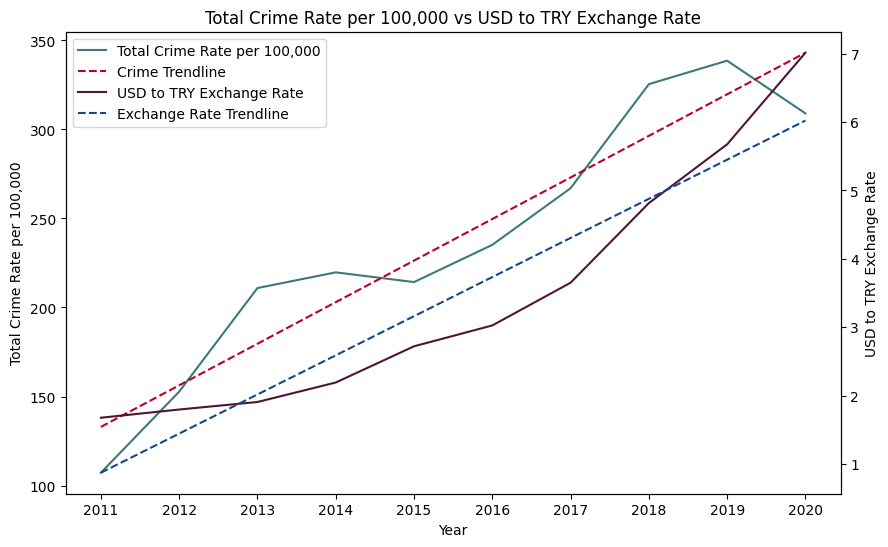

In [ ]:
# Extract the relevant data from your DataFrame
year = merged_df['Year'].values
crime_rate = merged_df['Rate per 100,000'].values
exchange_rate = merged_df['Average'].values

# Calculate the coefficients of the trendlines
crime_coefficients = np.polyfit(year, crime_rate, 1)
exchange_coefficients = np.polyfit(year, exchange_rate, 1)

# Extract the relevant data from your DataFrame
crime_rate = merged_df['Rate per 100,000'].values
average = merged_df['Average'].values

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(crime_rate, average)[0, 1]

# Create polynomial functions using the obtained coefficients
crime_polynomial = np.poly1d(crime_coefficients)
exchange_polynomial = np.poly1d(exchange_coefficients)

# Generate x values for plotting the trendlines
x_fit = np.linspace(min(year), max(year), num=100)

# Calculate the corresponding y values using the polynomial functions
crime_y_fit = crime_polynomial(x_fit)
exchange_y_fit = exchange_polynomial(x_fit)

# Creating the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the "Total" on the primary y-axis
ax1.plot(year, crime_rate, color='#3C787E', label='Total')
ax1.plot(x_fit, crime_y_fit, color='#B8002B', linestyle='dashed', label='Crime Trendline')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Crime Rate per 100,000')

# Creating a secondary y-axis
ax2 = ax1.twinx()

# Plotting the "Average" on the secondary y-axis
ax2.plot(year, exchange_rate, color='#4E1538', label='Average')
ax2.plot(x_fit, exchange_y_fit, color='#154888', linestyle='dashed', label='Exchange Rate Trendline')
ax2.set_ylabel('USD to TRY Exchange Rate')

# Setting title and legend
plt.title('Total Crime Rate per 100,000 vs USD to TRY Exchange Rate')
lines = ax1.get_lines() + ax2.get_lines()
correlation_label = f'Correlation: {correlation_coefficient:.2f}'
custom_labels = ['Total Crime Rate per 100,000', 'Crime Trendline', 'USD to TRY Exchange Rate', 'Exchange Rate Trendline']
plt.legend(lines, custom_labels)

# Setting x-axis ticks for every year
ax1.set_xticks(year)

# Display the plot
plt.show()

In [ ]:
from scipy import stats

# Your data
x = merged_df['Average'].values
y = merged_df['Rate per 100,000'].values

# Calculate Spearman's correlation coefficient and p-value
rho, p_value = stats.spearmanr(x, y)

print("Spearman's correlation coefficient (rho):", rho)
print()
print("P-value:", p_value)

Spearman's correlation coefficient (rho): 0.9515151515151514
P-value: 2.279854920641689e-05
